In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
import statsmodels.api as sm
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [5]:
# reading data
hotel = pd.read_csv('hotel_bookings.csv')

In [6]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
# shape of the data
hotel.shape

(119390, 32)

In [8]:
# statistical description of the data

hotel.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [9]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [10]:
# checking which column has how many null values

for i in hotel.columns:
    if hotel[i].isnull().sum()>0:
        print(f"{i} contains {np.round(hotel[i].isnull().sum()/hotel.shape[0]*100,4)}% null values.")

children contains 0.0034% null values.
country contains 0.4087% null values.
agent contains 13.6862% null values.
company contains 94.3069% null values.


In [11]:
# checking unique values in each column
for i in hotel.columns:
    print(i,':',len(hotel[i].unique()),'unique values.')

hotel : 2 unique values.
is_canceled : 2 unique values.
lead_time : 479 unique values.
arrival_date_year : 3 unique values.
arrival_date_month : 12 unique values.
arrival_date_week_number : 53 unique values.
arrival_date_day_of_month : 31 unique values.
stays_in_weekend_nights : 17 unique values.
stays_in_week_nights : 35 unique values.
adults : 14 unique values.
children : 6 unique values.
babies : 5 unique values.
meal : 5 unique values.
country : 178 unique values.
market_segment : 8 unique values.
distribution_channel : 5 unique values.
is_repeated_guest : 2 unique values.
previous_cancellations : 15 unique values.
previous_bookings_not_canceled : 73 unique values.
reserved_room_type : 10 unique values.
assigned_room_type : 12 unique values.
booking_changes : 21 unique values.
deposit_type : 3 unique values.
agent : 334 unique values.
company : 353 unique values.
days_in_waiting_list : 128 unique values.
customer_type : 4 unique values.
adr : 8879 unique values.
required_car_parkin

In [12]:
# filling children column by its mode as there is only 4 values which are missing

hotel['children'].fillna(hotel.children.mode()[0],inplace=True)

In [13]:
# agent shows the ID of the travel agency that made the booking which is not really important

hotel.drop('agent',axis=1,inplace=True)

In [14]:
# company shows the ID of the company/entity that made the booking or responsible for paying the booking.
# which is not really important and it also contains more than 94% null values

hotel.drop('company',axis=1,inplace=True)

In [15]:
# in country column we can see there are 178 unique values and there is no sense of filling these 488 null values
# so we drop this column

hotel.drop('country',axis=1,inplace=True)

In [16]:
categorical = []
numerical = []
for i in hotel.columns:
    if hotel[i].dtypes=='O':
        categorical.append(i)
    else:
        numerical.append(i)
print('Categorical: ',categorical)
print('\n')
print('Numerical: ',numerical)

Categorical:  ['hotel', 'arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']


Numerical:  ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


# Exploratory Data Analysis

**Target Column**

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64


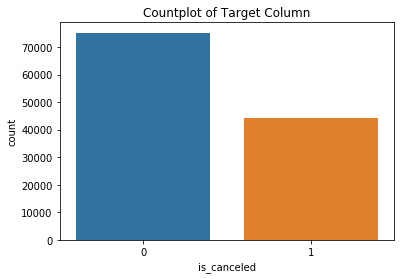

In [17]:
print(hotel.is_canceled.value_counts(normalize=True))
sns.countplot(hotel['is_canceled'])
plt.title('Countplot of Target Column')
plt.show()

There are 62% values belongs to 0 class i.e, Booking not canceled and 37% of booking got canceled. 

**Hotel Column**

In [18]:
print(hotel.hotel.value_counts(normalize=True))
print('\n')
print(hotel[hotel.is_canceled==1]['hotel'].value_counts(normalize=True))

City Hotel      0.664461
Resort Hotel    0.335539
Name: hotel, dtype: float64


City Hotel      0.748508
Resort Hotel    0.251492
Name: hotel, dtype: float64


There are 66% City Hotel and 33% Resort Hotel. Out of those bookings which got canceled 75% of them are City Hotel and 25% are Resort Hotel. So, we can say there is less chance that a booking of resort hotel gets a cancellation.

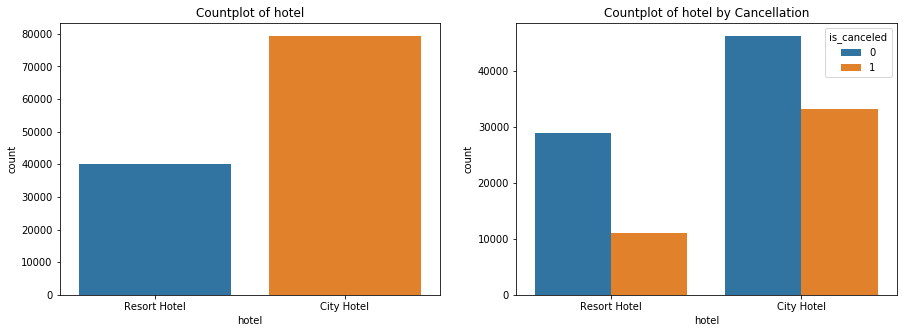

In [19]:
f, axes = plt.subplots(1, 2, figsize=(15,5), facecolor='white')
ax1 = sns.countplot(x='hotel', data=hotel,ax=axes[0])
ax2 = sns.countplot(x='hotel', hue = 'is_canceled', data=hotel,ax=axes[1])
ax1.set_title('Countplot of hotel')
ax2.set_title('Countplot of hotel by Cancellation')
plt.show()

**Meal**

In [20]:
print(hotel.meal.value_counts(normalize=True))

BB           0.773180
HB           0.121141
SC           0.089203
Undefined    0.009791
FB           0.006684
Name: meal, dtype: float64


In [21]:
hotel['meal'] = hotel['meal'].apply(lambda x:x if(x in ['BB','HB','FB']) else 'SC')

In [22]:
print(hotel.meal.value_counts(normalize=True))

BB    0.773180
HB    0.121141
SC    0.098995
FB    0.006684
Name: meal, dtype: float64


There is a high demand of around 77% Bed & Breakfast meal package comapred to other meal packages.

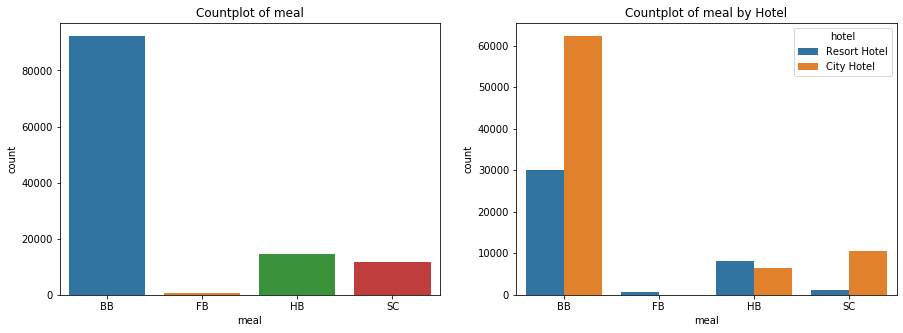

In [23]:
f, axes = plt.subplots(1, 2, figsize=(15,5), facecolor='white')
ax1 = sns.countplot(x='meal', data=hotel,ax=axes[0])
ax2 = sns.countplot(x='meal', hue = 'hotel', data=hotel,ax=axes[1])
ax1.set_title('Countplot of meal')
ax2.set_title('Countplot of meal by Hotel')
plt.show()

From the above graph, we can see that in City Hotel there is high demand of BB meal package. FB meal is preferrable only in Resort Hotel. SC(no meal) package is mainly in City Hotel as people may stay in hotel for very few days. And the HB has equal proportion in both CIty as well as in Resort Hotels.

**Distribution Channel**

In [24]:
print(hotel.distribution_channel.value_counts(normalize=True))

TA/TO        0.819750
Direct       0.122665
Corporate    0.055926
GDS          0.001617
Undefined    0.000042
Name: distribution_channel, dtype: float64


Here, global distribution system (GDS) is a computerised network system owned or operated by a company that enables transactions between travel industry service providers, mainly airlines, hotels, car rental companies, and travel agencies.
GDS is often used to tap into the corporate travel market because it has the ability to present hotels, flights, and car rentals in one simple interface which is convenient. This category is similar to corporate sub-category so we combine these two together.

In [25]:
hotel.distribution_channel = hotel.distribution_channel.apply(lambda x:x if(x in ['TA/TO','Direct','Undefined']) else 'GDC')

In [26]:
print(hotel.distribution_channel.value_counts(normalize=True))

TA/TO        0.819750
Direct       0.122665
GDC          0.057543
Undefined    0.000042
Name: distribution_channel, dtype: float64


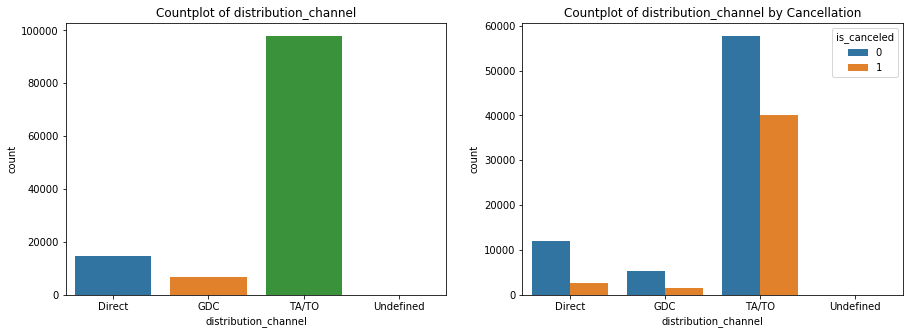

In [27]:
f, axes = plt.subplots(1, 2, figsize=(15,5), facecolor='white')
ax1 = sns.countplot(x='distribution_channel', data=hotel,ax=axes[0])
ax2 = sns.countplot(x='distribution_channel', hue = 'is_canceled', data=hotel,ax=axes[1])
ax1.set_title('Countplot of distribution_channel')
ax2.set_title('Countplot of distribution_channel by Cancellation')
plt.show()

**Deposit Type**

In [28]:
print(hotel.deposit_type.value_counts(normalize=True))

No Deposit    0.876464
Non Refund    0.122179
Refundable    0.001357
Name: deposit_type, dtype: float64


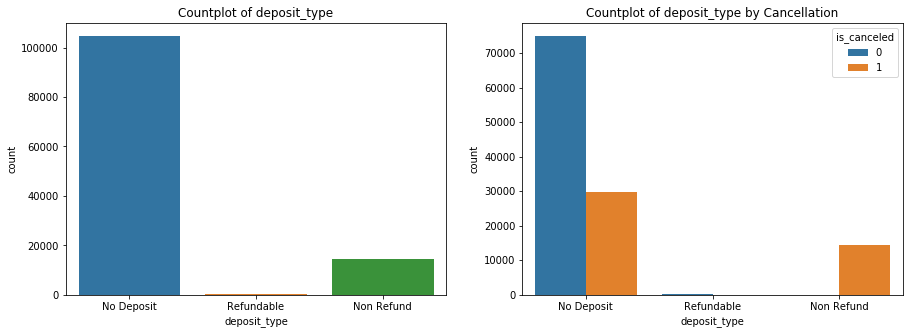

In [29]:
f, axes = plt.subplots(1, 2, figsize=(15,5), facecolor='white')
ax1 = sns.countplot(x='deposit_type', data=hotel,ax=axes[0])
ax2 = sns.countplot(x='deposit_type', hue = 'is_canceled', data=hotel,ax=axes[1])
ax1.set_title('Countplot of deposit_type')
ax2.set_title('Countplot of deposit_type by Cancellation')
plt.show()

**Customer Type**

In [30]:
print(hotel.customer_type.value_counts(normalize=True))

Transient          0.750591
Transient-Party    0.210436
Contract           0.034140
Group              0.004833
Name: customer_type, dtype: float64


75% of the customers are of Transient Customer Type. 21% were Transient-Party and the rest were Contract and group.

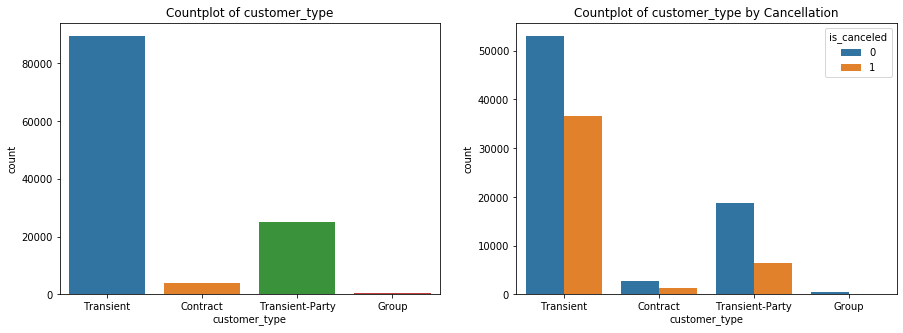

In [31]:
f, axes = plt.subplots(1, 2, figsize=(15,5), facecolor='white')
ax1 = sns.countplot(x='customer_type', data=hotel,ax=axes[0])
ax2 = sns.countplot(x='customer_type', hue = 'is_canceled', data=hotel,ax=axes[1])
ax1.set_title('Countplot of customer_type')
ax2.set_title('Countplot of customer_type by Cancellation')
plt.show()

**Arrival Date Year**

In [32]:
print(hotel.arrival_date_year.value_counts(normalize=True))

2016    0.474973
2017    0.340791
2015    0.184237
Name: arrival_date_year, dtype: float64


It comprehend bookings due to arrive between the 1st of July of 2015 and the 31st of August 2017, including bookings that effectively arrived and bookings that were canceled. So,it is obvious that 2016 has maximum bookings.

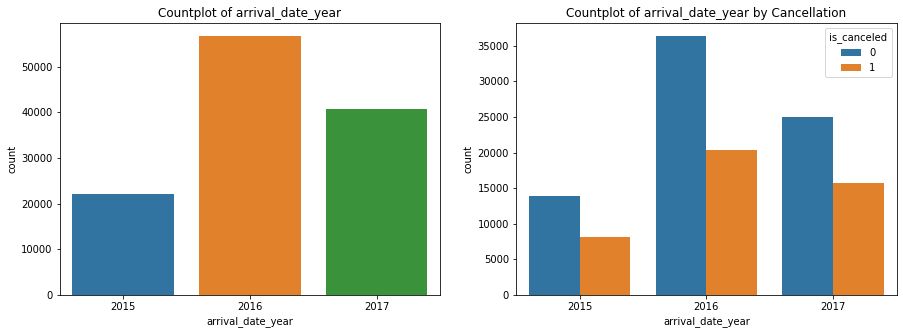

In [33]:
f, axes = plt.subplots(1, 2, figsize=(15,5), facecolor='white')
ax1 = sns.countplot(x='arrival_date_year', data=hotel,ax=axes[0])
ax2 = sns.countplot(x='arrival_date_year', hue = 'is_canceled', data=hotel,ax=axes[1])
ax1.set_title('Countplot of arrival_date_year')
ax2.set_title('Countplot of arrival_date_year by Cancellation')
plt.show()

**Reservation Status**

In [34]:
print(hotel.reservation_status.value_counts(normalize=True))

Check-Out    0.629584
Canceled     0.360307
No-Show      0.010110
Name: reservation_status, dtype: float64


In [35]:
print(hotel[hotel.is_canceled==1]['reservation_status'].value_counts(normalize=True))

Canceled    0.972707
No-Show     0.027293
Name: reservation_status, dtype: float64


From above result of value counts we can see that there is a clear seperation of target for this feature. So, we will delete this feature for further modelling process. Logically as well, if you already know the reservation status of bookings, so there is no sense of prediction whether that booking gets canceled or not.

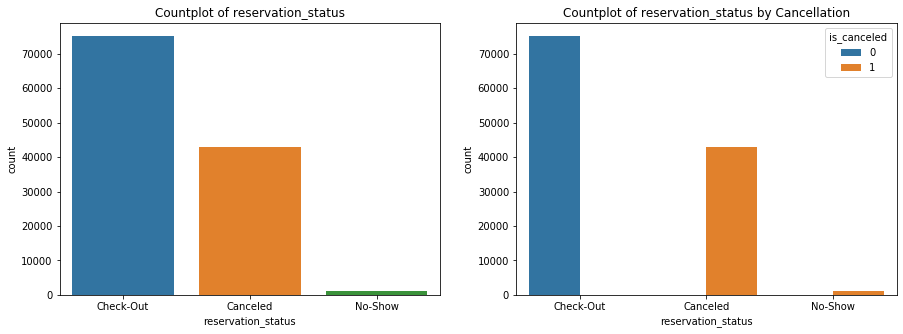

In [36]:
f, axes = plt.subplots(1, 2, figsize=(15,5), facecolor='white')
ax1 = sns.countplot(x='reservation_status', data=hotel,ax=axes[0])
ax2 = sns.countplot(x='reservation_status', hue = 'is_canceled', data=hotel,ax=axes[1])
ax1.set_title('Countplot of reservation_status')
ax2.set_title('Countplot of reservation_status by Cancellation')
plt.show()

The same can be observed from the above graph as well.

**Market Segment**

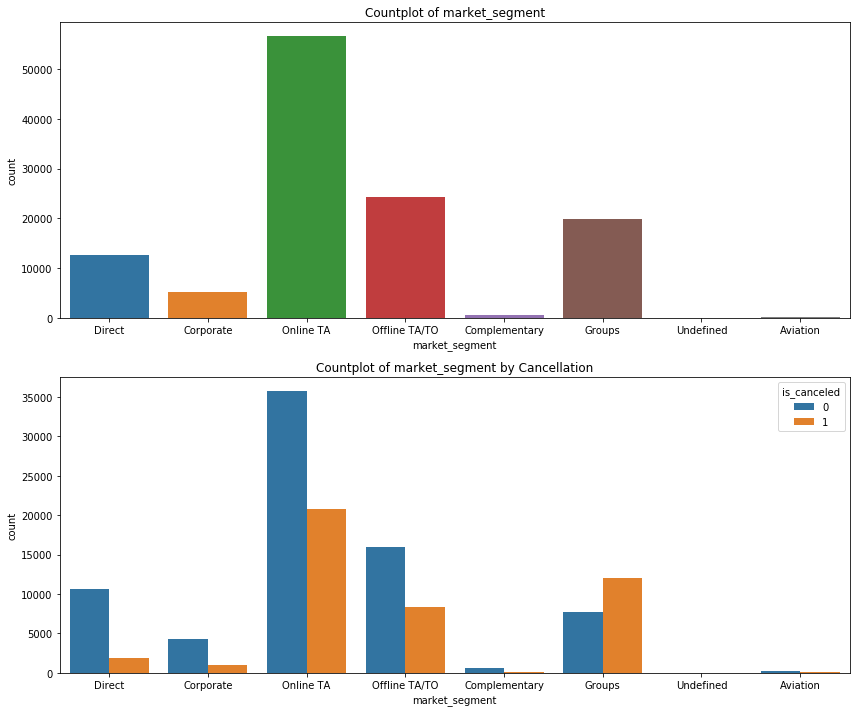

In [37]:
f, axes = plt.subplots(2, 1, figsize=(12,10), facecolor='white')
ax1 = sns.countplot(x='market_segment', data=hotel,ax=axes[0])
ax2 = sns.countplot(x='market_segment', hue = 'is_canceled', data=hotel,ax=axes[1])
ax1.set_title('Countplot of market_segment')
ax2.set_title('Countplot of market_segment by Cancellation')
plt.tight_layout()
plt.show()

In [38]:
print(hotel[hotel.is_canceled==1]['market_segment'].value_counts(normalize=True))

Online TA        0.468954
Groups           0.273539
Offline TA/TO    0.187930
Direct           0.043732
Corporate        0.022431
Complementary    0.002193
Aviation         0.001176
Undefined        0.000045
Name: market_segment, dtype: float64


From the above graph, we can see that groups is the only category which has more cancellation than non cancellation.
Direct and Corporate sub-category has comparetively very less cancellation.
While Online TA, Offline TA/TO has accquire 47% and 18% resp. of the customers who cancelled there booking.
Rest are very low in number.

**Arrival Date Month**

In [39]:
print(hotel.arrival_date_month.value_counts(normalize=True))

August       0.116233
July         0.106047
May          0.098760
October      0.093475
April        0.092880
June         0.091624
September    0.088014
March        0.082034
February     0.067577
November     0.056906
December     0.056789
January      0.049661
Name: arrival_date_month, dtype: float64


August is the busiest month for booking and January has least bookings.

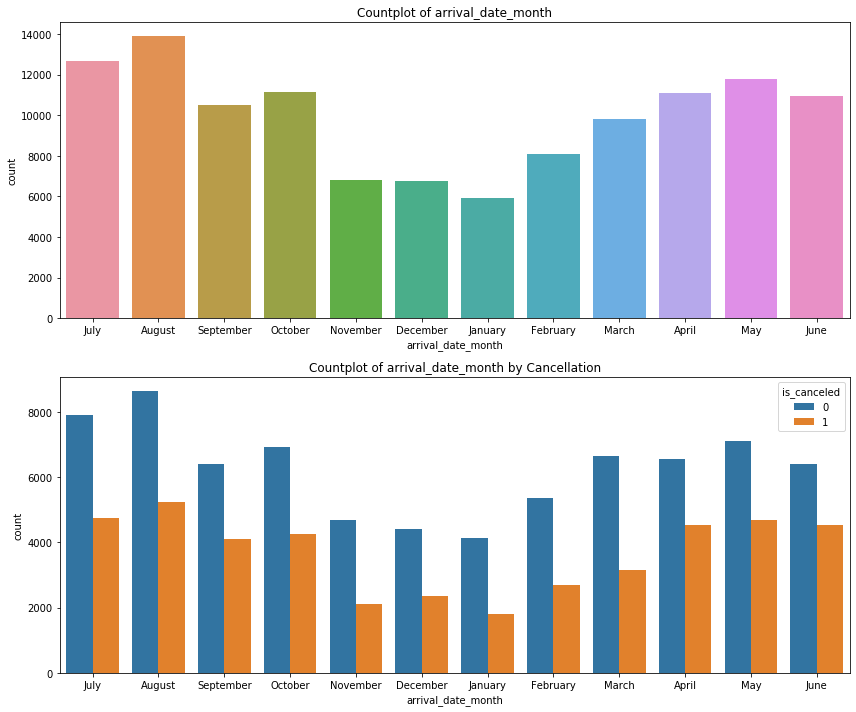

In [40]:
f, axes = plt.subplots(2, 1, figsize=(12,10), facecolor='white')
ax1 = sns.countplot(x='arrival_date_month', data=hotel,ax=axes[0])
ax2 = sns.countplot(x='arrival_date_month', hue = 'is_canceled', data=hotel,ax=axes[1])
ax1.set_title('Countplot of arrival_date_month')
ax2.set_title('Countplot of arrival_date_month by Cancellation')
plt.tight_layout()
plt.show()

**Distribution of lead_time, arrival_date_week_number, adr, arrival_date_day_of_month.**

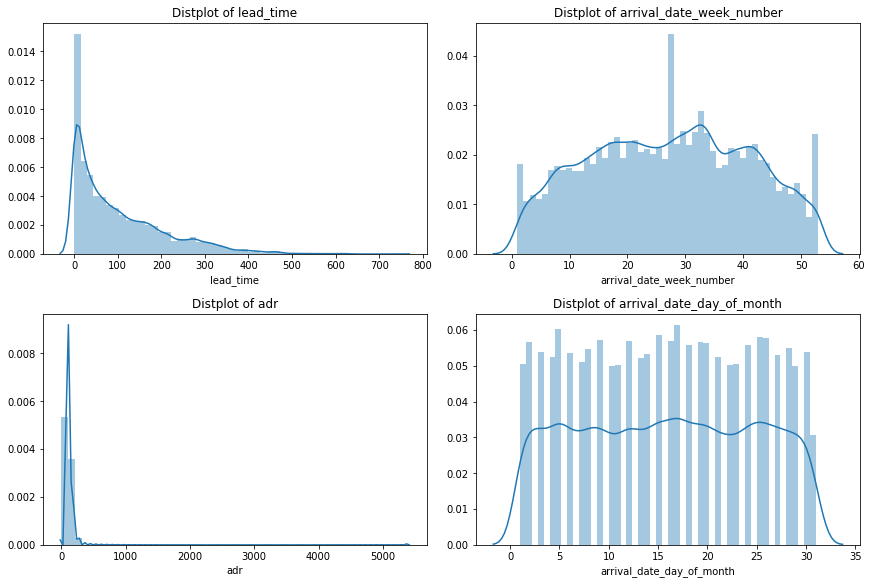

In [41]:
figs, axes = plt.subplots(2,2, figsize=(12,8), constrained_layout=True)
ax = axes.flat
column = ['lead_time', 'arrival_date_week_number', 'adr','arrival_date_day_of_month']
for col,ax in zip(column, ax):
    sns.distplot(hotel[col], ax=ax) 
    ax.set_title(f"Distplot of {col}")
plt.show()

**Country**

In [104]:
hotel.country.value_counts(1).head(10)

PRT    0.408656
GBR    0.102008
FRA    0.087593
ESP    0.072059
DEU    0.061286
ITA    0.031673
IRL    0.028385
BEL    0.019697
BRA    0.018704
NLD    0.017695
Name: country, dtype: float64

PRT i.e, Portugal is the country which contains 40% of the booking.

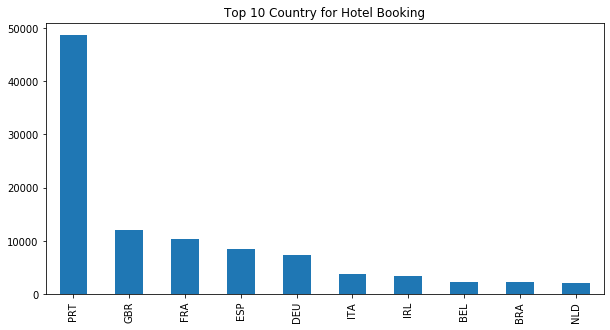

In [48]:
plt.figure(figsize=(10,5))
hotel.country.value_counts().head(10).plot.bar()
plt.title('Top 10 Country for Hotel Booking')
plt.show()

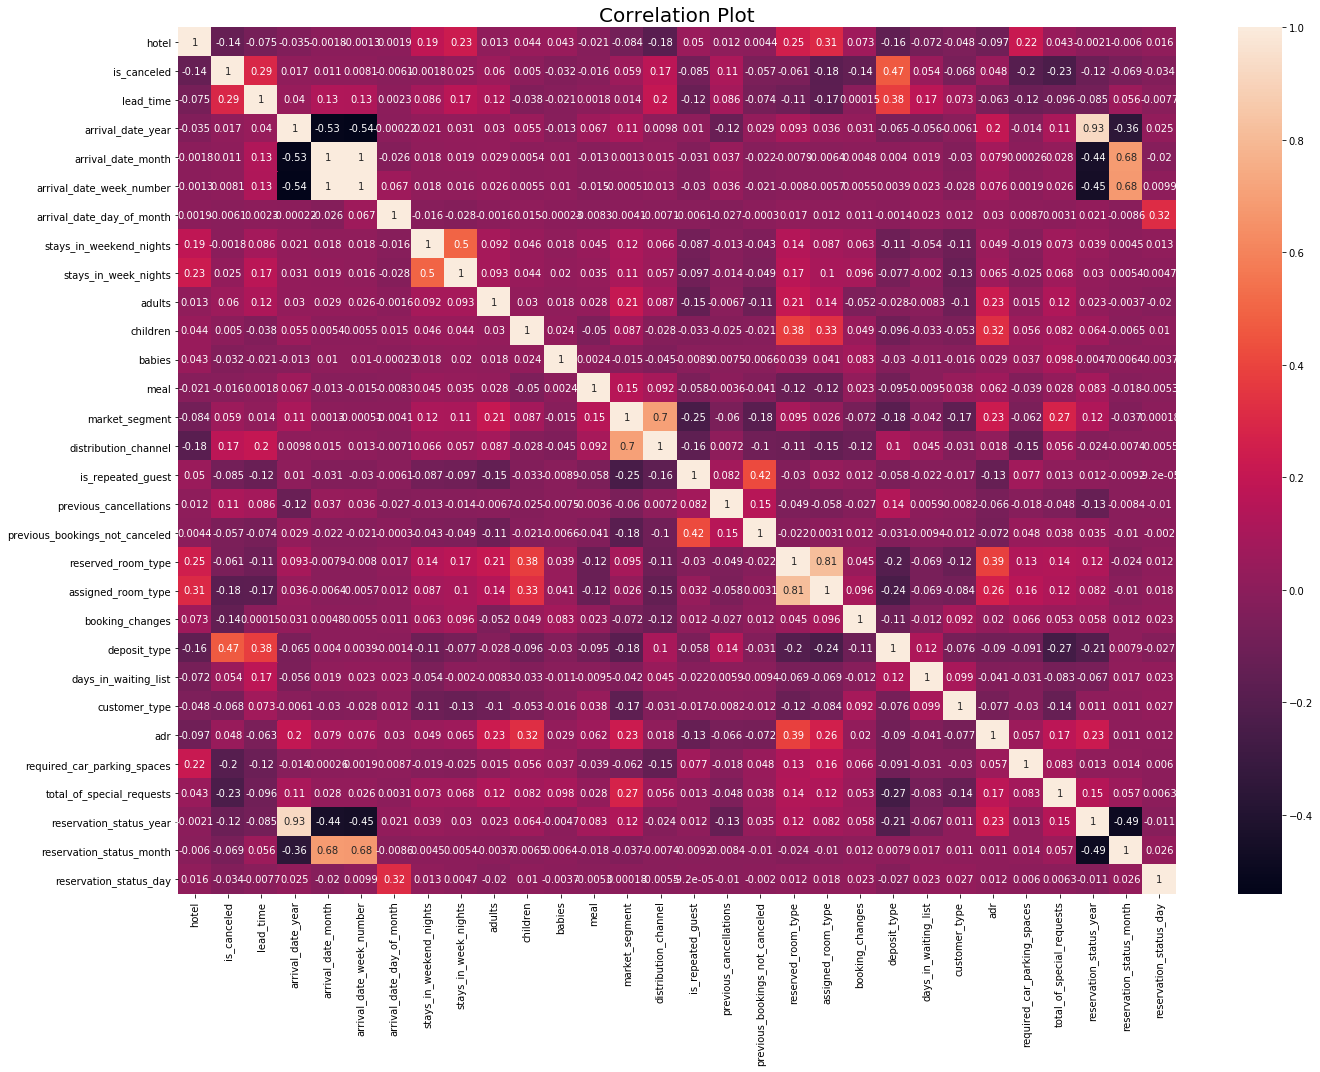

In [67]:
plt.figure(figsize=(20,15))
sns.heatmap(hotel.corr(),annot=True)
plt.title('Correlation Plot',fontdict={'fontsize':20})
plt.tight_layout()
plt.show()

# Model Building

**Label Endocing Categorical Variables**

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
labelencoder = LabelEncoder()
for i in ['hotel', 'meal', 'market_segment', 'distribution_channel','reserved_room_type',\
          'assigned_room_type','deposit_type', 'customer_type']:
    hotel[i]= labelencoder.fit_transform(hotel[i])

In [19]:
# manual encoding for arrival_date_month column
hotel['arrival_date_month'].replace({'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,
                                 'August':8,'September':9,'October':10,'November':11,'December':12},inplace=True)

In [20]:
a = hotel['reservation_status_date'].str.split("-",expand=True).astype(float)
hotel['reservation_status_year'] = a[0]
hotel['reservation_status_month'] = a[1]
hotel['reservation_status_day'] = a[2]

In [21]:
hotel.drop('reservation_status_date',axis=1,inplace=True)
hotel.drop('reservation_status',axis=1,inplace=True) # from above observation made we are dropping this column for modelling.

In [22]:
hotel.corr()['is_canceled'].sort_values(ascending=False).head(20)

is_canceled                       1.000000
deposit_type                      0.468634
lead_time                         0.293123
distribution_channel              0.167600
previous_cancellations            0.110133
adults                            0.060017
market_segment                    0.059338
days_in_waiting_list              0.054186
adr                               0.047557
stays_in_week_nights              0.024765
arrival_date_year                 0.016660
arrival_date_month                0.011022
arrival_date_week_number          0.008148
children                          0.005036
stays_in_weekend_nights          -0.001791
arrival_date_day_of_month        -0.006130
meal                             -0.017678
babies                           -0.032491
reservation_status_day           -0.034131
previous_bookings_not_canceled   -0.057358
Name: is_canceled, dtype: float64

In [23]:
X = hotel.drop('is_canceled',axis=1)
y = hotel.is_canceled

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [25]:
X_train.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_year,reservation_status_month,reservation_status_day
62422,0,277,2017,1,2,13,0,2,2,0.0,...,0,0,0,2,59.91,0,0,2016.0,4.0,11.0
22069,1,52,2016,3,12,15,0,2,2,0.0,...,0,0,0,2,54.00,1,1,2016.0,3.0,17.0
39169,1,183,2017,8,32,9,0,1,2,0.0,...,0,0,0,3,141.00,0,1,2017.0,8.0,10.0
6140,1,225,2016,5,22,26,1,3,1,0.0,...,2,0,0,3,60.00,0,0,2016.0,5.0,30.0
33105,1,0,2017,2,7,17,0,2,2,0.0,...,0,0,0,2,8.00,0,0,2017.0,2.0,19.0


In [26]:
print(X_train.shape)
print(X_test.shape)

(83573, 29)
(35817, 29)


In [27]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)
fold=KFold(shuffle=True,n_splits=5,random_state=42)

# Logistic Regression

In [28]:
lr = LogisticRegression(random_state=42,solver='liblinear')

result=cross_val_score(lr,X_train_scaled,y_train,cv=fold,scoring='roc_auc')

In [29]:
print(f"AUC Score: {result.mean()}, Variance: {np.round(np.var(result,ddof=1),4)}")

AUC Score: 0.9903786846720966, Variance: 0.0


As we can see we are getting a AUC Score of 99.03% from Logistic Regression this can be improved by using Decision Tree because there might be a chance that out data is not linear.

# Desicion Tree

In [55]:
dt  = DecisionTreeClassifier(random_state=42)
result=cross_val_score(dt,X_train,y_train,cv=fold,scoring='roc_auc')

In [56]:
print(f"AUC Score: {result.mean()}, Variance: {np.round(np.var(result,ddof=1),4)}")

AUC Score: 0.9372868670053034, Variance: 0.0


So that's not the case what we have accepted Logistic Regression is performing better than Decision Tree. 
Now we check our result with more complex models like Random Forest and Gradient Boost.

# Random Forest

In [57]:
rf = RandomForestClassifier(random_state=42)
result=cross_val_score(rf,X_train,y_train,cv=fold,scoring='roc_auc')

In [58]:
print(f"AUC Score: {result.mean()}, Variance: {np.round(np.var(result,ddof=1),4)}")

AUC Score: 0.9862300863668407, Variance: 0.0


# Gradient Boost

In [59]:
gb= GradientBoostingClassifier(random_state=42)
result=cross_val_score(gb,X_train_scaled,y_train,cv=fold,scoring='roc_auc')

In [60]:
print(f"AUC Score: {result.mean()}, Variance: {np.round(np.var(result,ddof=1),4)}")

AUC Score: 0.9694476704369107, Variance: 0.0


By observing the above result, we have a clear winner i.e, **Logistic Regression**. So we choose it as our final model.

In [32]:
lr = LogisticRegression(random_state=42,solver='liblinear')
lr.fit(X_train_scaled,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
y_test_pred = lr.predict(X_test_scaled)
y_test_prob = lr.predict_proba(X_test_scaled)[:,1]
print('Test Data')
print('Confusion Matrix:\n', confusion_matrix(y_test,y_test_pred))
print('Accuracy of Test:', accuracy_score(y_test,y_test_pred))
print('AUC of Test:', roc_auc_score(y_test,y_test_prob))
print('Classification Report of Test:\n',classification_report(y_test,y_test_pred))

Test Data
Confusion Matrix:
 [[22518    32]
 [ 1730 11537]]
Accuracy of Test: 0.9508054834296563
AUC of Test: 0.9915493905906942
Classification Report of Test:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96     22550
           1       1.00      0.87      0.93     13267

    accuracy                           0.95     35817
   macro avg       0.96      0.93      0.95     35817
weighted avg       0.95      0.95      0.95     35817



So finally on test data we are getting a AUC Score of 99.15% and Accuracy of 95.08% from Logistic Regression.